In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from collections import Counter
from matplotlib.patches import Ellipse

%matplotlib inline

In [30]:
df = pd.read_excel('TESTPYTHONSCATTER.xlsx', sheetname=1)

In [37]:
y_lbl, x_lbl = list(df)

x = df.Duration
y = df.Cost

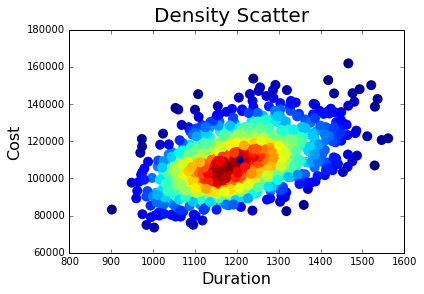

In [5]:
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100, edgecolor='')

fig.suptitle('Density Scatter', fontsize=20)
plt.xlabel(x_lbl, fontsize=16)
plt.ylabel(y_lbl, fontsize=16)

ax.scatter(x.mean(), y.mean(), c=6, s=50, edgecolor='')


plt.show()

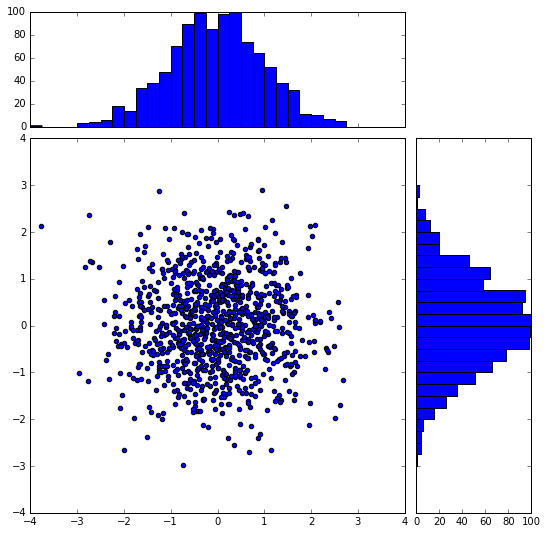

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)
#x = x.values
#y = y.values

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 0.25
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

In [18]:
lim

4.0

In [12]:
y.shape

(1000L,)

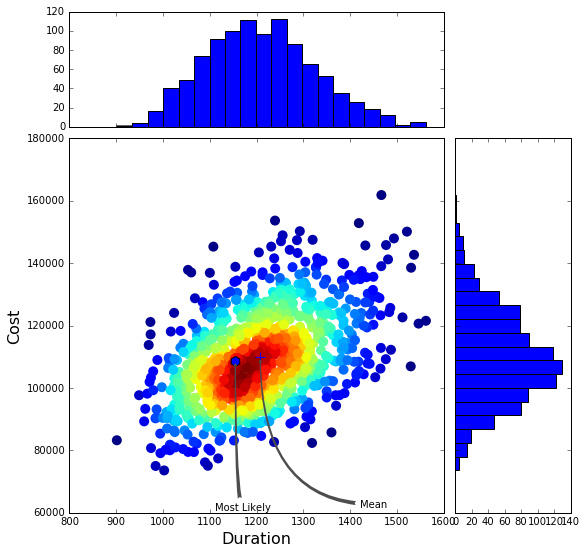

In [114]:
#x = df.Duration.values
#y = df.Cost.values

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# scatter labels
axScatter.set_xlabel(x_lbl, fontsize=16)
axScatter.set_ylabel(y_lbl, fontsize=16)

# no labels on histograms
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

axScatter.scatter(x, y, c=z, s=100, edgecolor='')

# set number of bins for histogram
bins = 20
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

# plot most likely values
ml_x = Counter(x).most_common(1)[0][0]
ml_y = Counter(y).most_common(1)[0][0]
axScatter.scatter(ml_x, ml_y, s = 100, marker= 'h')

# plot mean values
axScatter.scatter(x.mean(), y.mean(), s = 100, marker= '+')

# annotate the mean and most likely points
# http://matplotlib.org/examples/pylab_examples/annotation_demo2.html
axScatter.annotate('Mean',
            xy=(x.mean(), y.mean()), xycoords='data',
            xytext=(100, -150), textcoords='offset points',
            size=10,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.3", ec="none",
                            patchB = Ellipse((2, -1), 0.5, 0.5),
                            connectionstyle="angle3,angleA=0,angleB=-90"))

axScatter.annotate('Most Likely',
            xy=(ml_x, ml_y), xycoords='data',
            xytext=(-20, -150), textcoords='offset points',
            size=10,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.3", ec="none",
                            patchB = Ellipse((2, -1), 0.5, 0.5),
                            connectionstyle="angle3,angleA=0,angleB=-90"))


plt.show()